# Demonstration of mermaid's simple registration interface

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

import mermaid.simple_interface as SI
import mermaid.example_generation as EG
import mermaid.module_parameters as pars

Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/compute_settings.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/compute_settings_comments.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/baseconf_settings.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/baseconf_settings_comments.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/algconf_settings.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/algconf_settings_comments.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/democonf_settings.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/democonf_settings_comments.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/datapro_settings.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/datapro_settings_comments.json
Will read from /Users/rkwitt/Remote/mermaid/mermaid/../settings/respro_settings.json
Will r

First, we create an empty parameter dictionary ....

In [5]:
params = pars.ParameterDict()

Next, we create a synthetic image pair in 2D to register. We will also be adding noise to the background of these images.

In [6]:
use_synthetic_test_case = True
add_noise_to_bg = True
dim = 2
sz = 64

szEx = np.tile(sz, dim)
I0_syn, I1_syn, spacing_syn = EG.CreateSquares(dim, add_noise_to_bg).create_image_pair(szEx, params) 

Creating new category: root.square_example_images
Using default value = 10 for key = len_s of category = root.square_example_images
Using default value = 16 for key = len_l of category = root.square_example_images


`I0` and `I1` effectively constitute a batch of size 1. Hence, the numpy array is of shape `1x1x64x64`.

Size I0: (1, 1, 64, 64)
Size I1: (1, 1, 64, 64)


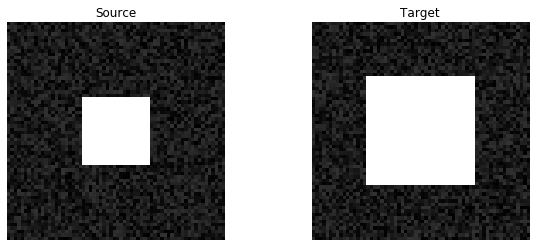

In [7]:
print('Size I0:', I0_syn.shape)
print('Size I1:', I1_syn.shape)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(I0_syn[0,0,:,:],cmap='gray')
plt.title('Source')
plt.axis('off');
plt.subplot(122)
plt.imshow(I1_syn[0,0,:,:],cmap='gray')
plt.title('Target')
plt.axis('off');

Alternatively, we can also create an example pair of realistic 2D MRI slices with spacing normalized to $[0,1]$. In that case, images are of size `1x1x128x128`.

In [8]:
I0_real, I1_real, spacing_real = EG.CreateRealExampleImages(dim).create_image_pair()

INFO: Image WAS intensity normalized when loading: [0.0,1.367119]
INFO: Normalizing the spacing to [0,1] in the largest dimension. (Turn normalize_spacing off if this is not desired.)
Normalize spacing: [2. 2. 2.] -> [0.00787402 0.00787402 0.00787402]
Normalize spacing, extent: [  0. 254. 254.] -> [0. 1. 1.]
Normalize spacing: [2. 2.] -> [0.00787402 0.00787402]
Normalize spacing, extent: [254. 254.] -> [1. 1.]
INFO: Image WAS intensity normalized when loading: [0.0,1.4618253]
INFO: Normalizing the spacing to [0,1] in the largest dimension. (Turn normalize_spacing off if this is not desired.)
Normalize spacing: [2. 2. 2.] -> [0.00787402 0.00787402 0.00787402]
Normalize spacing, extent: [  0. 254. 254.] -> [0. 1. 1.]
Normalize spacing: [2. 2.] -> [0.00787402 0.00787402]
Normalize spacing, extent: [254. 254.] -> [1. 1.]


Size I0: (1, 1, 128, 128)
Size I1: (1, 1, 128, 128)


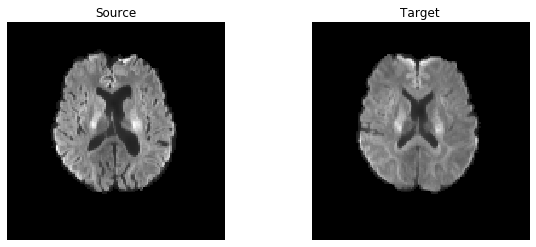

In [9]:
print('Size I0:', I0_real.shape)
print('Size I1:', I1_real.shape)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(I0_real[0,0,:,:],cmap='gray')
plt.title('Source')
plt.axis('off');
plt.subplot(122)
plt.imshow(I1_real[0,0,:,:],cmap='gray')
plt.title('Target')
plt.axis('off');

In [10]:
def show_image(I, title):
    plt.imshow(I[0,0,:,:], cmap='gray')
    plt.axis('off')
    plt.title(title)

Next, we are ready to create an instance of `SI.RegisterImagePair` and show all available registration models to select from.

In [11]:
si = SI.RegisterImagePair()
si.print_available_models()


Known registration models are:
------------------------------
                              affine_map: map-based affine registration
                           diffusion_map: displacement-based diffusion registration
                           curvature_map: displacement-based curvature registration
                     total_variation_map: displacement-based total variation registration
                                 svf_map: map-based stationary velocity field
                               svf_image: image-based stationary velocity field
               svf_scalar_momentum_image: image-based stationary velocity field using the scalar momentum
                 svf_scalar_momentum_map: map-based stationary velocity field using the scalar momentum
               svf_vector_momentum_image: image-based stationary velocity field using the vector momentum
                 svf_vector_momentum_map: map-based stationary velocity field using the vector momentum
                      lddmm_s

That's basically it. We can now simply use the `register_images` method of `SI.RegisterImagePair` with appropriate parameters. 

In the following examples of different registration models, we will always keep track of all intermediate results by 
setting the `recording_step` to 1, i.e., we record the intermediate results in each optimization iteration and turn visualization off, as we will visualize the results later by hand. You can also set `recording_step` to `None` in which case nothing is recorded. 

Also, you can set `visualization_step` to a non-zero value which will produce an overview plot of the intermediate registration results at the given visualization steps.

## Affine registration


In [12]:
si.register_images(I0_syn, I1_syn, spacing_syn, model_name='affine_map',
                   nr_of_iterations=200,
                   use_multi_scale=False,
                   visualize_step=None,
                   optimizer_name='sgd',
                   learning_rate=0.001,
                   rel_ftol=1e-7,
                   json_config_out_filename=('test2d_tst.json', 'test2d_tst_with_comments.json'),
                   params='test2d_tst.json',
                   recording_step=1)

Loading parameter file = test2d_tst.json
Overwriting key = use_map; category = root.model.deformation; value =  True -> True
Overwriting key = type; category = root.model.registration_model; value =  svf_scalar_momentum_map -> affine_map
Overwriting key = name; category = root.optimizer; value =  sgd -> sgd
Overwriting key = nr_of_iterations; category = root.optimizer.single_scale; value =  50 -> 200
Overwriting key = rel_ftol; category = root.optimizer.single_scale; value =  1e-07 -> 1e-07
mapLowResFactor = 1: performing computations at original resolution.
Overwriting key = use_map; category = root.model.deformation; value =  True -> True
Overwriting key = map_low_res_factor; category = root.model.deformation; value =  1.0 -> 1.0
Overwriting key = type; category = root.model.registration_model; value =  affine_map -> affine_map
Overwriting key = type; category = root.model.registration_model; value =  affine_map -> affine_map
Using map-based affine_map model
works in mermaid iter mod

We now fetch our registration history to access all intermediate results.

In [13]:
h = si.get_history()

First, we plot the source/target as well as the warped result. For this, we simply access the last optimization iteration and collect the source/target and warped image which are stored in `h['recording'][-1]` and can be accessed via the keys `iS`, `iT` and `iW`.

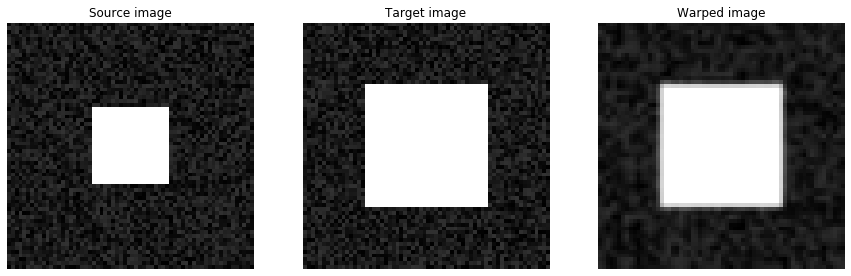

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(131); show_image(h['recording'][-1]['iS'], 'Source image')
plt.subplot(132); show_image(h['recording'][-1]['iT'], 'Target image')
plt.subplot(133); show_image(h['recording'][-1]['iW'], 'Warped image')

We can also show a simple **checkerboard plot** using `mermaid.visualize_registration_results.checkerboard_2d` as follows:

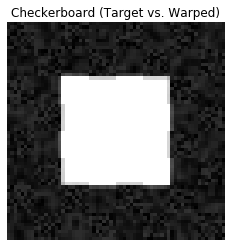

In [15]:
from mermaid.visualize_registration_results import checkerboard_2d

iT = h['recording'][-1]['iT'][0,0,:,:]
iW = h['recording'][-1]['iW'][0,0,:,:]

cb_img = checkerboard_2d(iT,iW)
plt.imshow(cb_img ,cmap='gray')
plt.axis('off')
plt.title('Checkerboard (Target vs. Warped)');

It's also quite simple to plot the corresponding **deformation grid** (i.e., at the final optimization iteration) as follows:

In [16]:
def show_warped_with_grid(I, phi, title):
    plt.imshow(I[0,0,:,:] ,cmap='gray')
    plt.contour(phi[0, 0, :, :], 
            np.linspace(-1, 1, 20),
            colors='r', 
            linestyles='solid',
            linewidths=0.5)
    plt.contour(phi[0, 1, :, :], 
            np.linspace(-1, 1, 20),
            colors='r', 
            linestyles='solid',
            linewidths=0.5)

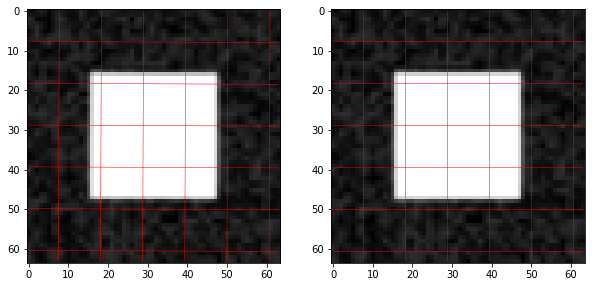

In [17]:
i = 130
plt.figure(figsize=(10,5))
plt.subplot(121); show_warped_with_grid(h['recording'][i]['iW'], 
                                        h['recording'][i]['phiWarped'], 
                                        'Deformation (at iteration {})'.format(i))
plt.subplot(122); show_warped_with_grid(h['recording'][-1]['iW'], 
                                        h['recording'][-1]['phiWarped'], 
                                        'Deformation (at convergence)')

Additionally, lets show the energy terms over the optimization iterations ...

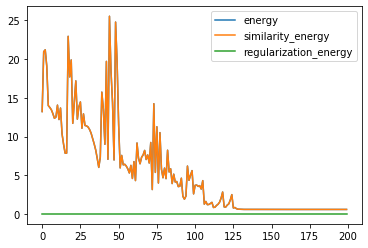

In [18]:
e_p, = plt.plot(h['energy'], label='energy')
s_p, = plt.plot(h['similarity_energy'], label='similarity_energy')
r_p, = plt.plot(h['regularization_energy'], label='regularization_energy')
plt.legend(handles=[e_p,s_p,r_p])
plt.show()

## Using mermaids visualization

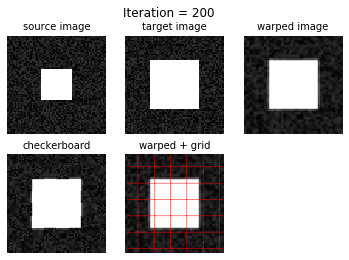

<Figure size 432x288 with 0 Axes>

In [19]:
import torch
import mermaid.utils as utils
import mermaid.visualize_registration_results as vizreg

I_0 = torch.from_numpy(I0_syn)
I_1 = torch.from_numpy(I1_syn)
phi = si.get_map()
I_W = utils.compute_warped_image_multiNC(I_0, 
                                         phi, 
                                         spacing_syn, 
                                         spline_order=1)
vizreg.show_current_images(len(si.get_history()['energy']), 
                           I_0, 
                           I_1, 
                           I_W, 
                           phiWarped=phi)

## SVF scalar momentum

Now lets switch the model to a **stationary velocity field (SVF)** with a scalar momentum parametrization.

In [20]:
si.register_images(I0_syn, I1_syn, spacing_syn, model_name='svf_scalar_momentum_map',
                   nr_of_iterations=50,
                   use_multi_scale=False,
                   visualize_step=None,
                   optimizer_name='sgd',
                   learning_rate=0.01,
                   rel_ftol=1e-7,
                   json_config_out_filename=('test2d_tst.json', 'test2d_tst_with_comments.json'),
                   params='test2d_tst.json',
                   recording_step=1)
h = si.get_history()

Loading parameter file = test2d_tst.json
Overwriting key = use_map; category = root.model.deformation; value =  True -> True
Overwriting key = type; category = root.model.registration_model; value =  affine_map -> svf_scalar_momentum_map
Overwriting key = name; category = root.optimizer; value =  sgd -> sgd
Overwriting key = nr_of_iterations; category = root.optimizer.single_scale; value =  200 -> 50
Overwriting key = rel_ftol; category = root.optimizer.single_scale; value =  1e-07 -> 1e-07
mapLowResFactor = 1: performing computations at original resolution.
Overwriting key = use_map; category = root.model.deformation; value =  True -> True
Overwriting key = map_low_res_factor; category = root.model.deformation; value =  1.0 -> 1.0
Overwriting key = type; category = root.model.registration_model; value =  svf_scalar_momentum_map -> svf_scalar_momentum_map
Overwriting key = type; category = root.model.registration_model; value =  svf_scalar_momentum_map -> svf_scalar_momentum_map
Using 

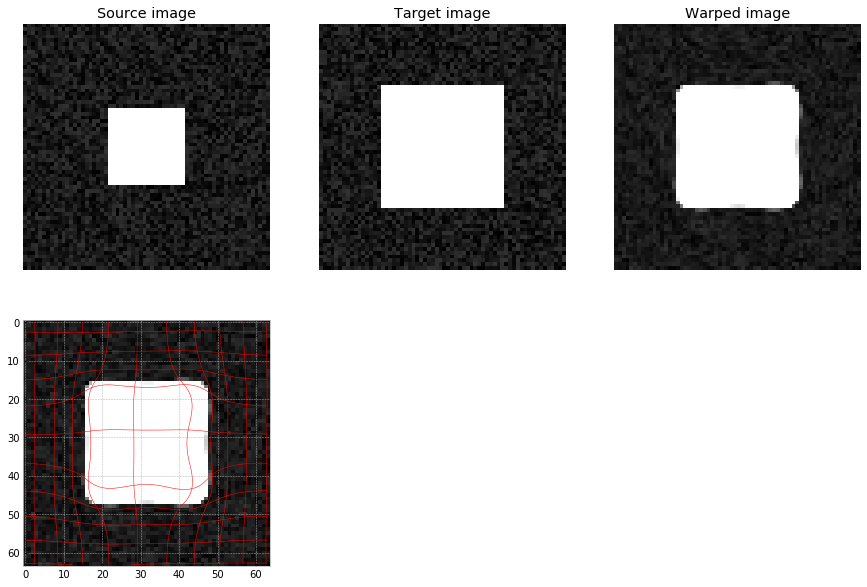

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(231); show_image(h['recording'][-1]['iS'], 'Source image')
plt.subplot(232); show_image(h['recording'][-1]['iT'], 'Target image')
plt.subplot(233); show_image(h['recording'][-1]['iW'], 'Warped image')
plt.subplot(234); show_warped_with_grid(h['recording'][-1]['iW'],h['recording'][-1]['phiWarped'], 'Deformation (at convergence)')

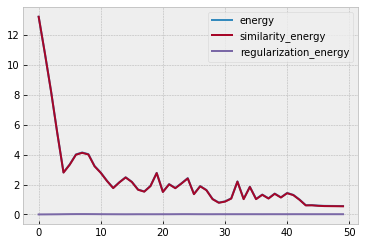

In [22]:
e_p, = plt.plot(h['energy'], label='energy')
s_p, = plt.plot(h['similarity_energy'], label='similarity_energy')
r_p, = plt.plot(h['regularization_energy'], label='regularization_energy')
plt.legend(handles=[e_p,s_p,r_p])
plt.show()

## LDDDM (shooting, scalar momentum)

In [23]:
si.register_images(I0_syn, I1_syn, spacing_syn, model_name='lddmm_shooting_scalar_momentum_map',
                   nr_of_iterations=50,
                   use_multi_scale=False,
                   visualize_step=None,
                   optimizer_name='sgd',
                   learning_rate=0.01,
                   rel_ftol=1e-7,
                   json_config_out_filename=('test2d_tst.json', 'test2d_tst_with_comments.json'),
                   params='test2d_tst.json',
                   recording_step=1)
h = si.get_history()

Loading parameter file = test2d_tst.json
Overwriting key = use_map; category = root.model.deformation; value =  True -> True
Overwriting key = type; category = root.model.registration_model; value =  svf_scalar_momentum_map -> lddmm_shooting_scalar_momentum_map
Overwriting key = name; category = root.optimizer; value =  sgd -> sgd
Overwriting key = nr_of_iterations; category = root.optimizer.single_scale; value =  50 -> 50
Overwriting key = rel_ftol; category = root.optimizer.single_scale; value =  1e-07 -> 1e-07
mapLowResFactor = 1: performing computations at original resolution.
Overwriting key = use_map; category = root.model.deformation; value =  True -> True
Overwriting key = map_low_res_factor; category = root.model.deformation; value =  1.0 -> 1.0
Overwriting key = type; category = root.model.registration_model; value =  lddmm_shooting_scalar_momentum_map -> lddmm_shooting_scalar_momentum_map
Overwriting key = type; category = root.model.registration_model; value =  lddmm_shooti

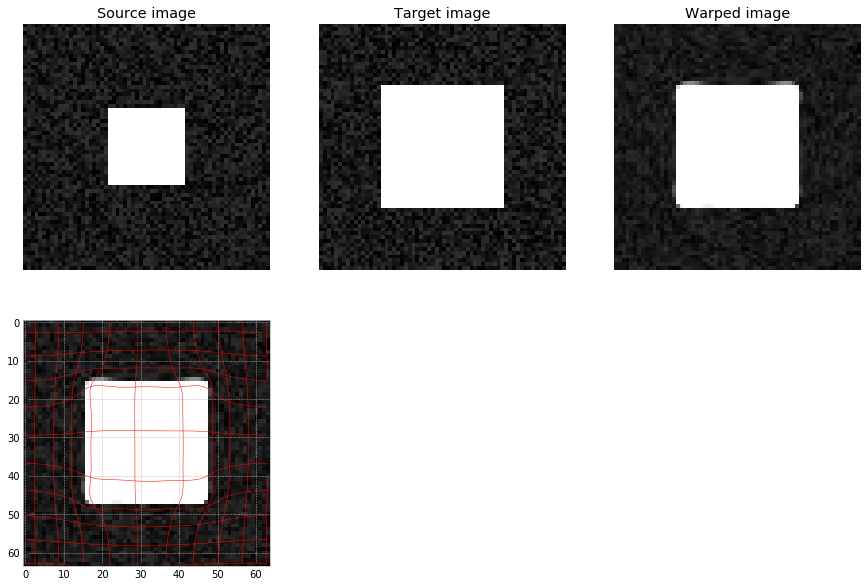

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(231); show_image(h['recording'][-1]['iS'], 'Source image')
plt.subplot(232); show_image(h['recording'][-1]['iT'], 'Target image')
plt.subplot(233); show_image(h['recording'][-1]['iW'], 'Warped image')
plt.subplot(234); show_warped_with_grid(h['recording'][-1]['iW'],h['recording'][-1]['phiWarped'], 'Deformation (at convergence)')

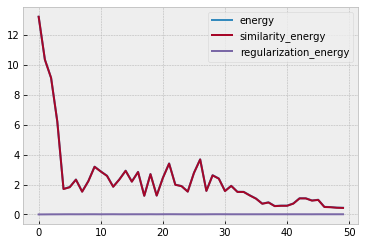

In [25]:
e_p, = plt.plot(h['energy'], label='energy')
s_p, = plt.plot(h['similarity_energy'], label='similarity_energy')
r_p, = plt.plot(h['regularization_energy'], label='regularization_energy')
plt.legend(handles=[e_p,s_p,r_p])
plt.show()